In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv
from scipy.io import loadmat
import random

dataset = loadmat("problem1 (3).mat")
items = list(dataset.items())  # List of tuples of (key,values)
random.shuffle(items)
x, y = dataset['x'], dataset['y'] 

size_of_data = x.shape[0]
x_train, x_test = x[:int(size_of_data*0.70)], x[int(size_of_data*0.70):]
y_train, y_test = y[:int(size_of_data*0.70)], y[int(size_of_data*0.70):]

In [18]:
def poly_model(x_train, x_test, y_train, y_test, max_dimen):
        
    d_powers = np.array(range(max_dimen+1))
    X_train = np.power(x_train, d_powers)
    X_test = np.power(x_test, d_powers)
    model_param_optim = np.linalg.pinv(X_train).dot(y_train)
    
    train_err = (0.5/X_train.shape[0])*np.sum(np.power(y_train - X_train.dot(model_param_optim), 2))
    test_err = (0.5/X_test.shape[0])*np.sum(np.power(y_test - X_test.dot(model_param_optim), 2))
    
    if max_dimen in (2, 3, 4, 5, 6, 7, 8, 9, 10, 20):
        plt.figure(max_dimen)
        plt.plot(x_train, y_train, 'r.', label='training data')
        plt.plot(x_test, y_test, 'c.', label='testing data')
        plt.plot(x_train, X_train.dot(model_param_optim), 'g.', label='model prediction')
        plt.title('d='+str(max_dimen))
        plt.legend()
        plt.show()
    
    
    return train_err, test_err

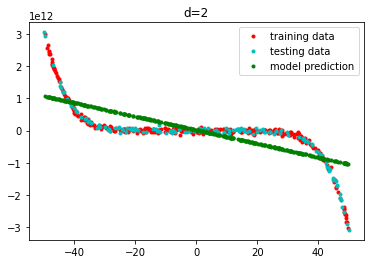

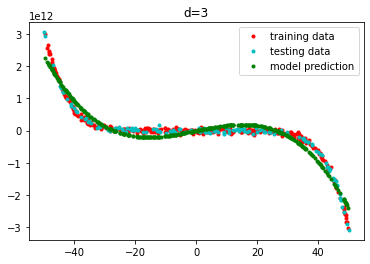

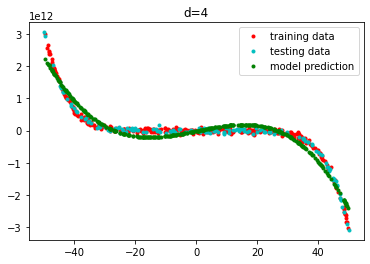

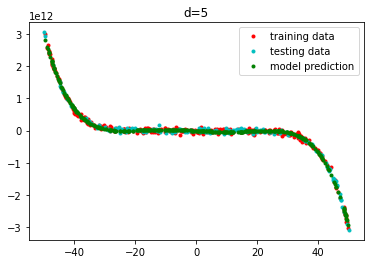

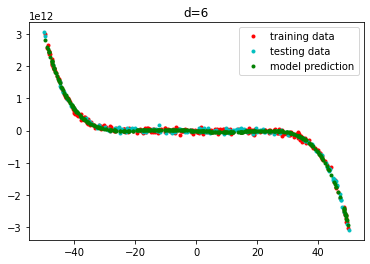

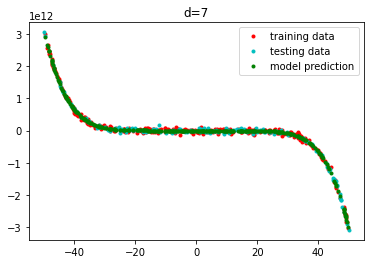

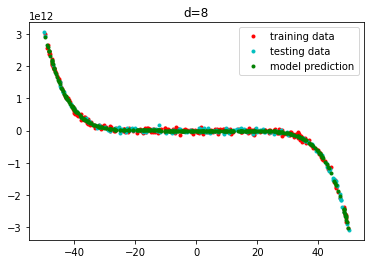

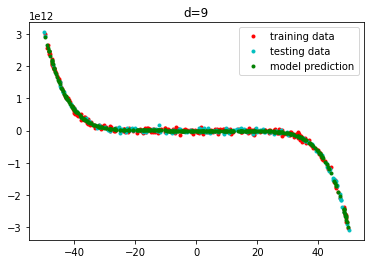

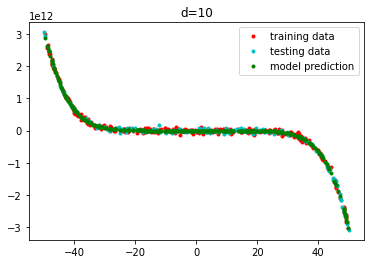

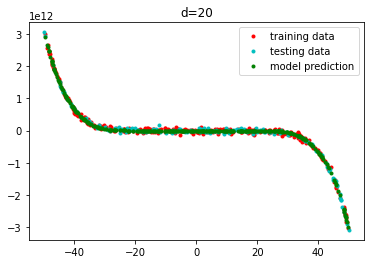

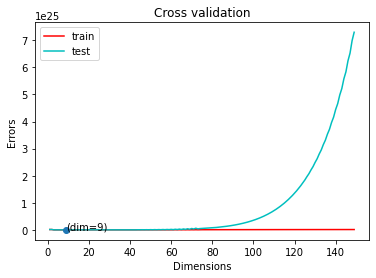

In [19]:
max_dimension = 150
errors = []
for i in range(1,max_dimension):
    errors.append(poly_model(x_train, x_test, y_train, y_test, i))

train_errors = [e[0] for e in errors]
test_errors = [e[1] for e in errors]
min_err_idx = np.argmin(train_errors)
plt_train, = plt.plot(range(1,max_dimension), train_errors,'r',label='train')
plt_test,  = plt.plot(range(1,max_dimension), test_errors, 'c',label='test')
plt.xlabel('Dimensions')
plt.ylabel('Errors')
plt.title('Cross validation')
plt.plot(min_err_idx, test_errors[min_err_idx], 'o')
plt.text(min_err_idx, test_errors[min_err_idx], "(dim={})".format(str(min_err_idx)))
plt.legend(handles=[plt_train, plt_test])
plt.show()